In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris

In [5]:
from sklearn.cluster import KMeans

In [6]:
df = load_iris()

In [7]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
data = pd.DataFrame(df['data'])

In [9]:
target = pd.DataFrame(df['target'])

In [10]:
df = pd.concat([data, target], axis=1)

In [11]:
df.head()

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.columns = ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)',
  'species'           
]

In [13]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
71,6.1,2.8,4.0,1.3,1
44,5.1,3.8,1.9,0.4,0
66,5.6,3.0,4.5,1.5,1
104,6.5,3.0,5.8,2.2,2
40,5.0,3.5,1.3,0.3,0


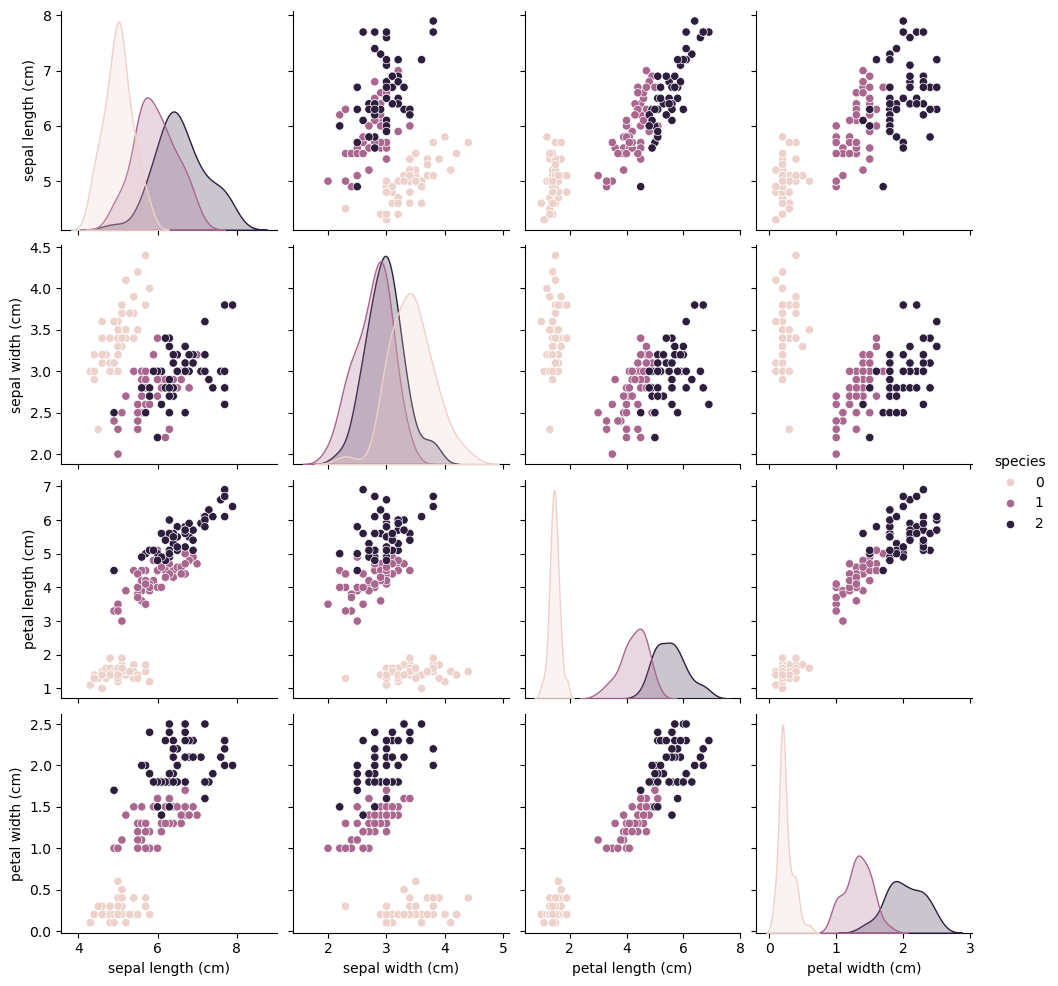

In [14]:
sns.pairplot(df, hue='species')

In [15]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

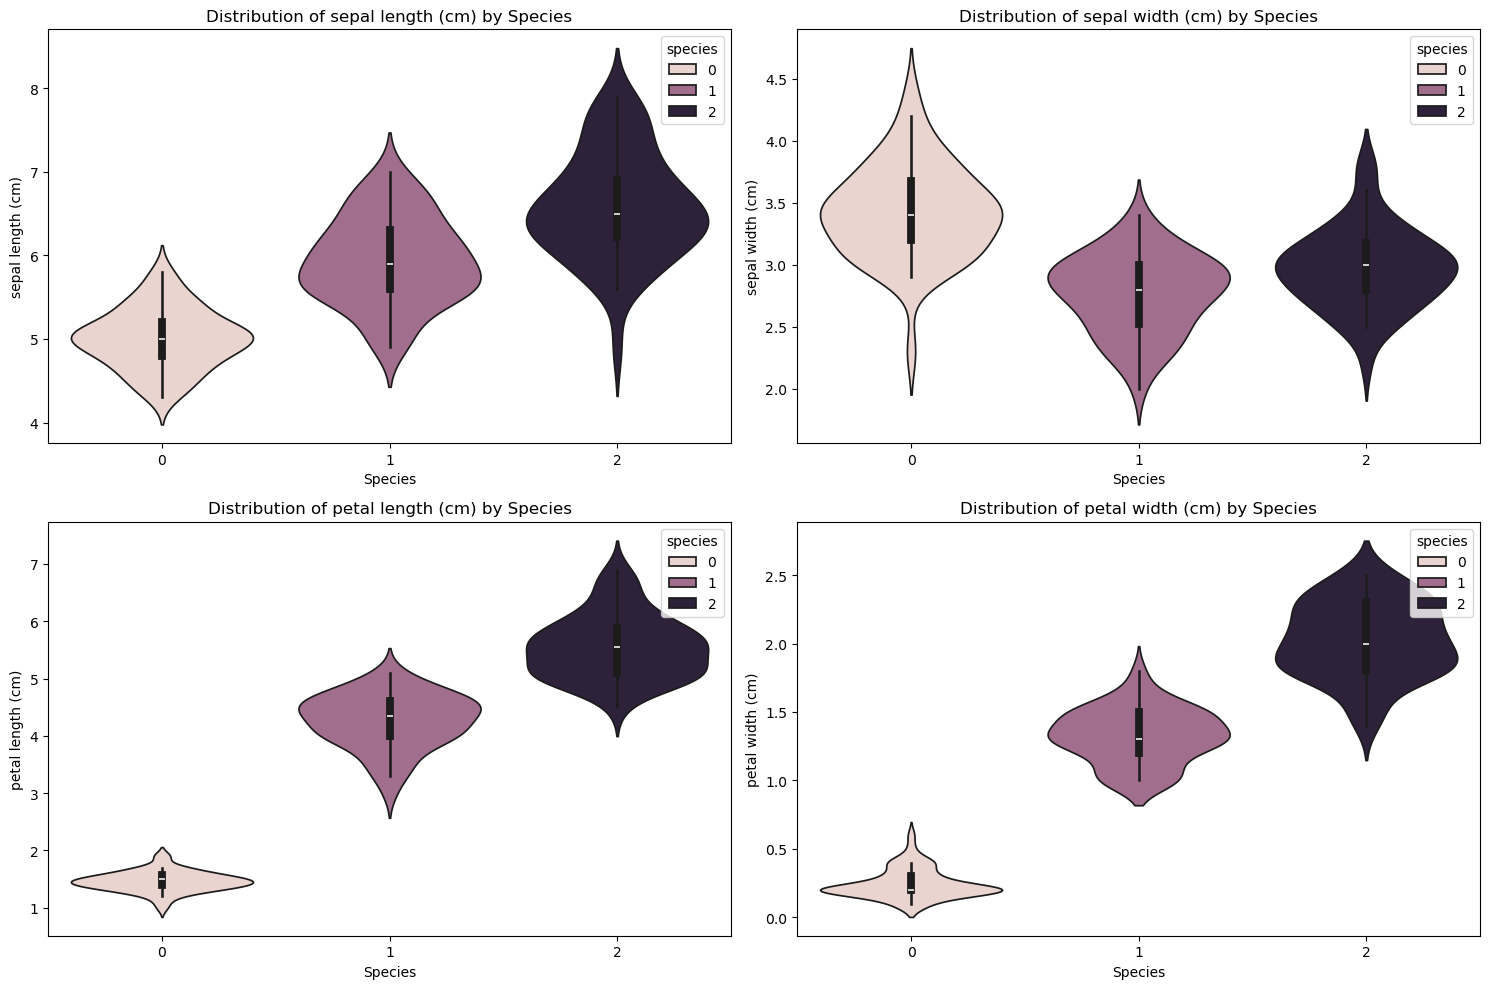

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.violinplot(x='species', y=feature, data=df, ax=axes[i], hue='species')
    axes[i].set_title(f'Distribution of {feature} by Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

<AxesSubplot:>

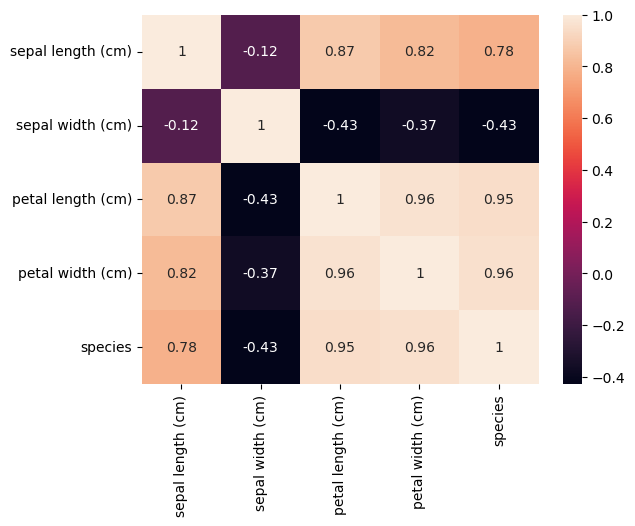

In [17]:
sns.heatmap(df.corr(), annot=True)

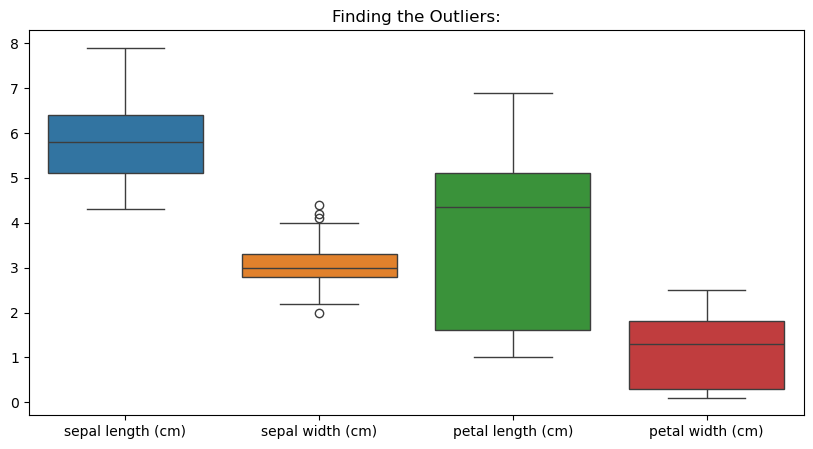

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[features])
plt.title('Finding the Outliers:')
plt.show()

In [19]:
x = df[features].values

In [20]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# WE are using the Elbow Method to find out the optimum no. of clusters

In [21]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Elbow Method:

#####It is an unsupervised method that helps us to find optimum no. of cluster in KMeans.

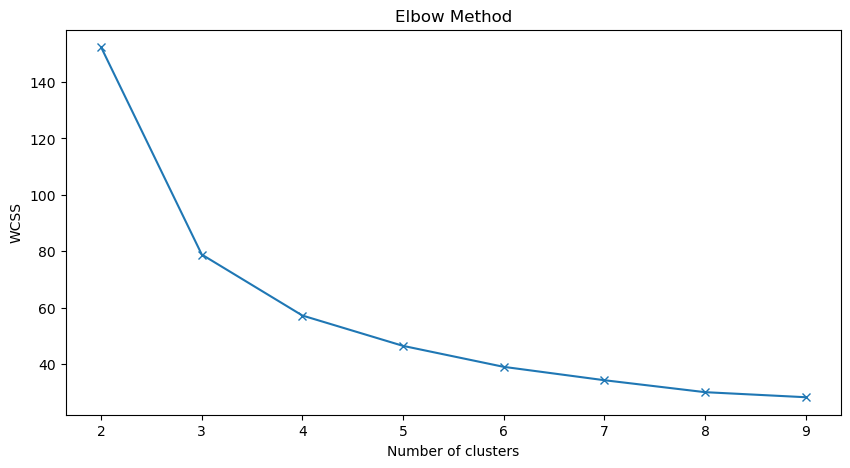

In [22]:
plt.figure(figsize=(10,5))
plt.plot(range(2, 10), wcss, marker='x')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying KMeans with thwe optimum no. of clusters

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

# Groups Before clustering

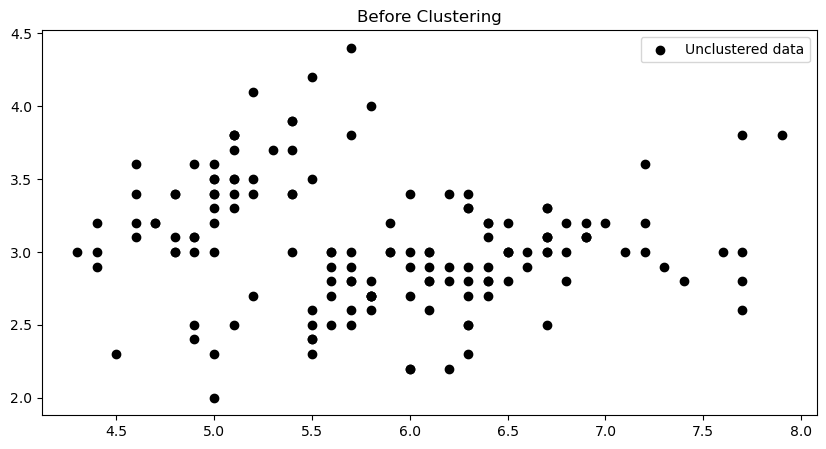

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(x[:, 0], x[:, 1], c='black', label='Unclustered data')  # Assuming you want the first two features
plt.title('Before Clustering: Clustering based upon Species: ')
plt.legend()
plt.show()

In [27]:
n_features = x.shape[1]
print(f'Number of features: {n_features}')

Number of features: 4


# Groups After clustering

C:\Users\abdul\AppData\Local\Temp\ipykernel_19980\2085403076.py:8: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],


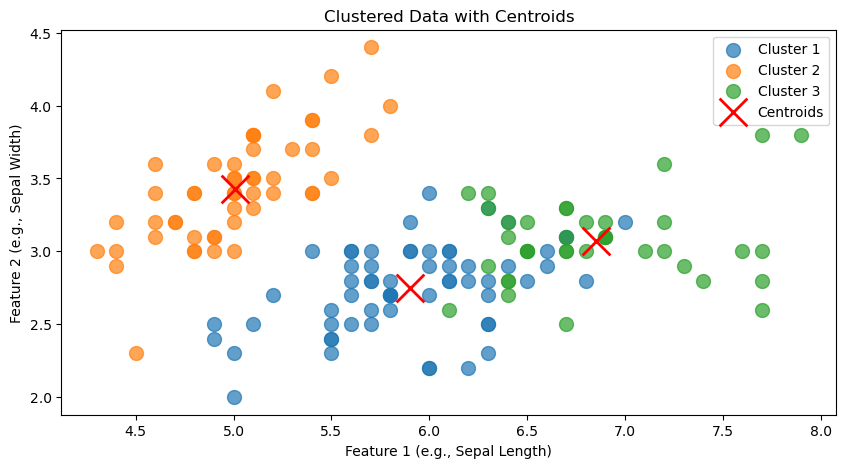

In [28]:
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s=100, label=f'Cluster {i + 1}', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=400, marker='x', c='red', label='Centroids', edgecolor='white', linewidth=2)
plt.title('After Clustering: Clustering based upon Species: ')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# Silhouette Score:

Howwell our data points belong to our new clusters.

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(x, kmeans.labels_)

0.5528190123564101

# KMeans Inertia:

It measures that how closely our data points were grouped.

In [ ]:
# Done